<a href="https://colab.research.google.com/github/EkaterinaVZ/ML-examples/blob/main/NTM_(Neural_Turing_Machines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Turing Machine (NTM)**
### Одним из способов улучшения стандартных рекуррентных сетей для успешного решения алгоритмических задач является введение адресной памяти большого размера. В отличие от машины Тьюринга, **нейронная машина Тьюринга (NTM**) является полностью дифференцируемой моделью, которая может быть обучена модификациями метода градиентного спуска, что дает практический механизм для обучения программ на примерах.


---



## **Возникновение**

<div style="text-align: justify;">

* Впервые модель NTM была предложена в 2014-ом году в работе ["Neural Turing
Machines"](https://arxiv.org/abs/1410.5401v2) (Alex Graves, Greg Wayne, Ivo Danihelka). Авторы статьи не публиковали свой исходный код.  
*В 2016-ом году в работе ["Hybrid computing using a neural network with dynamic external memory"](https://gwern.net/doc/reinforcement-learning/model-free/2016-graves.pdf) (Alex Graves, Greg Wayne, Malcolm Reynolds) была предложена усовершенствованная модель
нейронной сети с внешней памятью под названием дифференцируемый нейронный компьютер. В ней также было лишь краткое описание принципов работы этой модели.
*В 2018-ом году в работе ["Robust and Scalable Differentiable Neural Computer for Question Answering"](https://aclanthology.org/W18-2606/) (Jörg Franke, Jan Niehues, Alex Waibel) были предложены четыре модификации для дифференцируемого нейронного компьютера, которые позволяли улучшить качество решения задач, связанных с вопросно-ответными системами (QA- tasks).<br>






**На сегодняшний день очень высока актуальность создания новых рекуррентных нейросетевых моделей, способных хранить большие объёмы данных, а также успешно решать задачи, предъявляемые к вопросно-ответным системам (QA-задачи).**
</div>

---


## **Области применения NTM:**



– Обработка естественного языка (например, машинный перевод, вопросно-ответные системы).<br>
– Прогнозирование временных рядов.<br>
– Распознавание рукописного текста.<br>
– Распознавание речи.<br>
– Генерация текстов.<br>
– Алгоритмические задачи.<br>
– Логические игры (при помощи обучения с подкреплением).


---




## **Архитектура Neural Turing Machine**

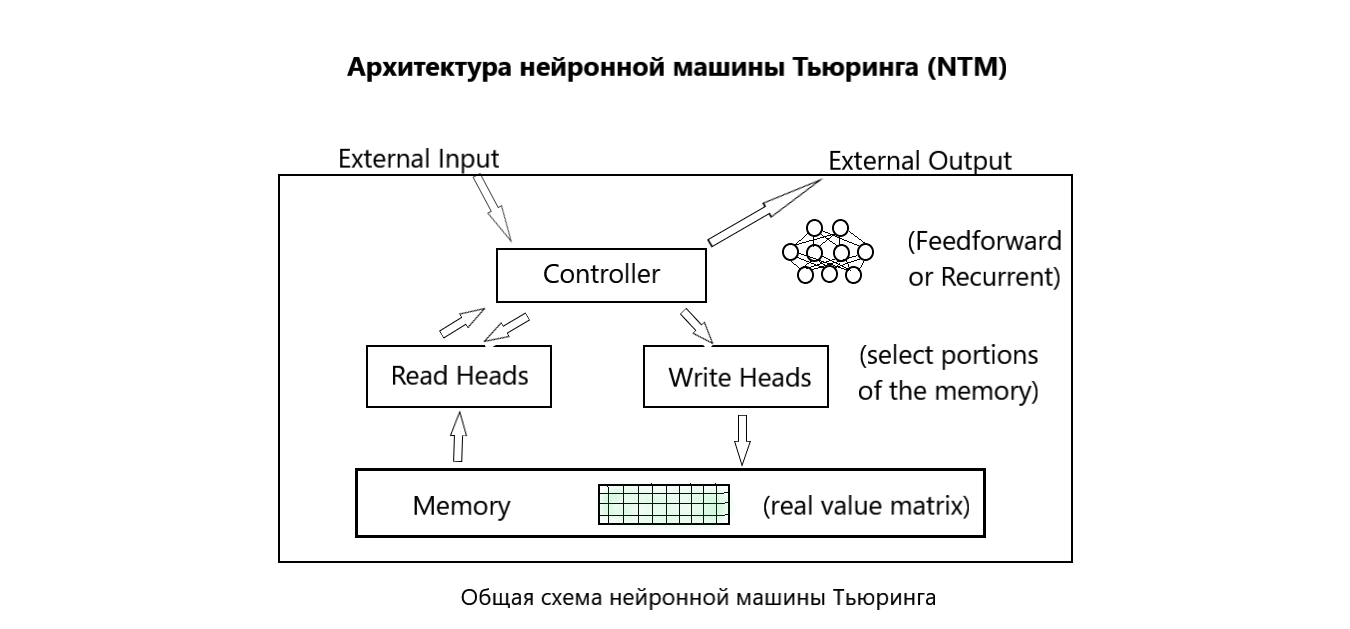

**Архитектура NTM содержит два основных компонента:**

---


* контроллер (нейронная сеть)
* и матрицу внешней памяти<br>

 Как и большинство нейронных сетей, контроллер взаимодействует с внешним миром через входные и выходные векторы. В отличие от стандартных сетей, он также взаимодействует с **матрицей памяти, используя операции чтения и записи**.

Основной принцип работы NTM заключается в том, чтобы **предоставить нейронной сети доступ к внешней памяти** (по аналогии с моделью машины Тьюринга, в которой имеются контроллер, головки чтения и записи, внешняя память). Эта модификация позволяет **увеличить размер "долгосрочной" памяти модели**. Нейронная машина Тьюринга (NTM) обучается как обычная нейронная сеть используя входные данные, получаемые из выборки, но также обучается как хранить эту информацию и когда её извлекать из внешней памяти.

### **Составляющие и гиперпараметры:**

При инициализации NTM требуется задать некоторые гиперпараметры:
* размер внешней памяти: количество слотов памяти m и длина слота n;
*	диапазон перемещений головки r;
*	количество считывающих головок hr;
*	количество записывающих головок hw;
*	тип контроллера: RNN, LSTM, GRU, FFNN;
*	количество скрытых слоёв H и количество нейронов в скрытых слоях контроллера hi.


---


*M0* – начальное состояние матрицы внешней памяти. Её можно инициализировать случайным образом (обычно это делают при помощи стандартного нормального распределения с малой дисперсией).
Нейронная машина Тьюринга состоит из контроллера *controller*, внешней памяти *M*, считывающих и записывающих головок, реализованных при помощи *функций чтения, записи* и *механизмов адресации*.


---


**NTM использует комбинацию двух методов адресации**:
* адресацию на основе контента (на основе содержимого);
* механизм внимания, основанный на местоположении слотов в памяти.



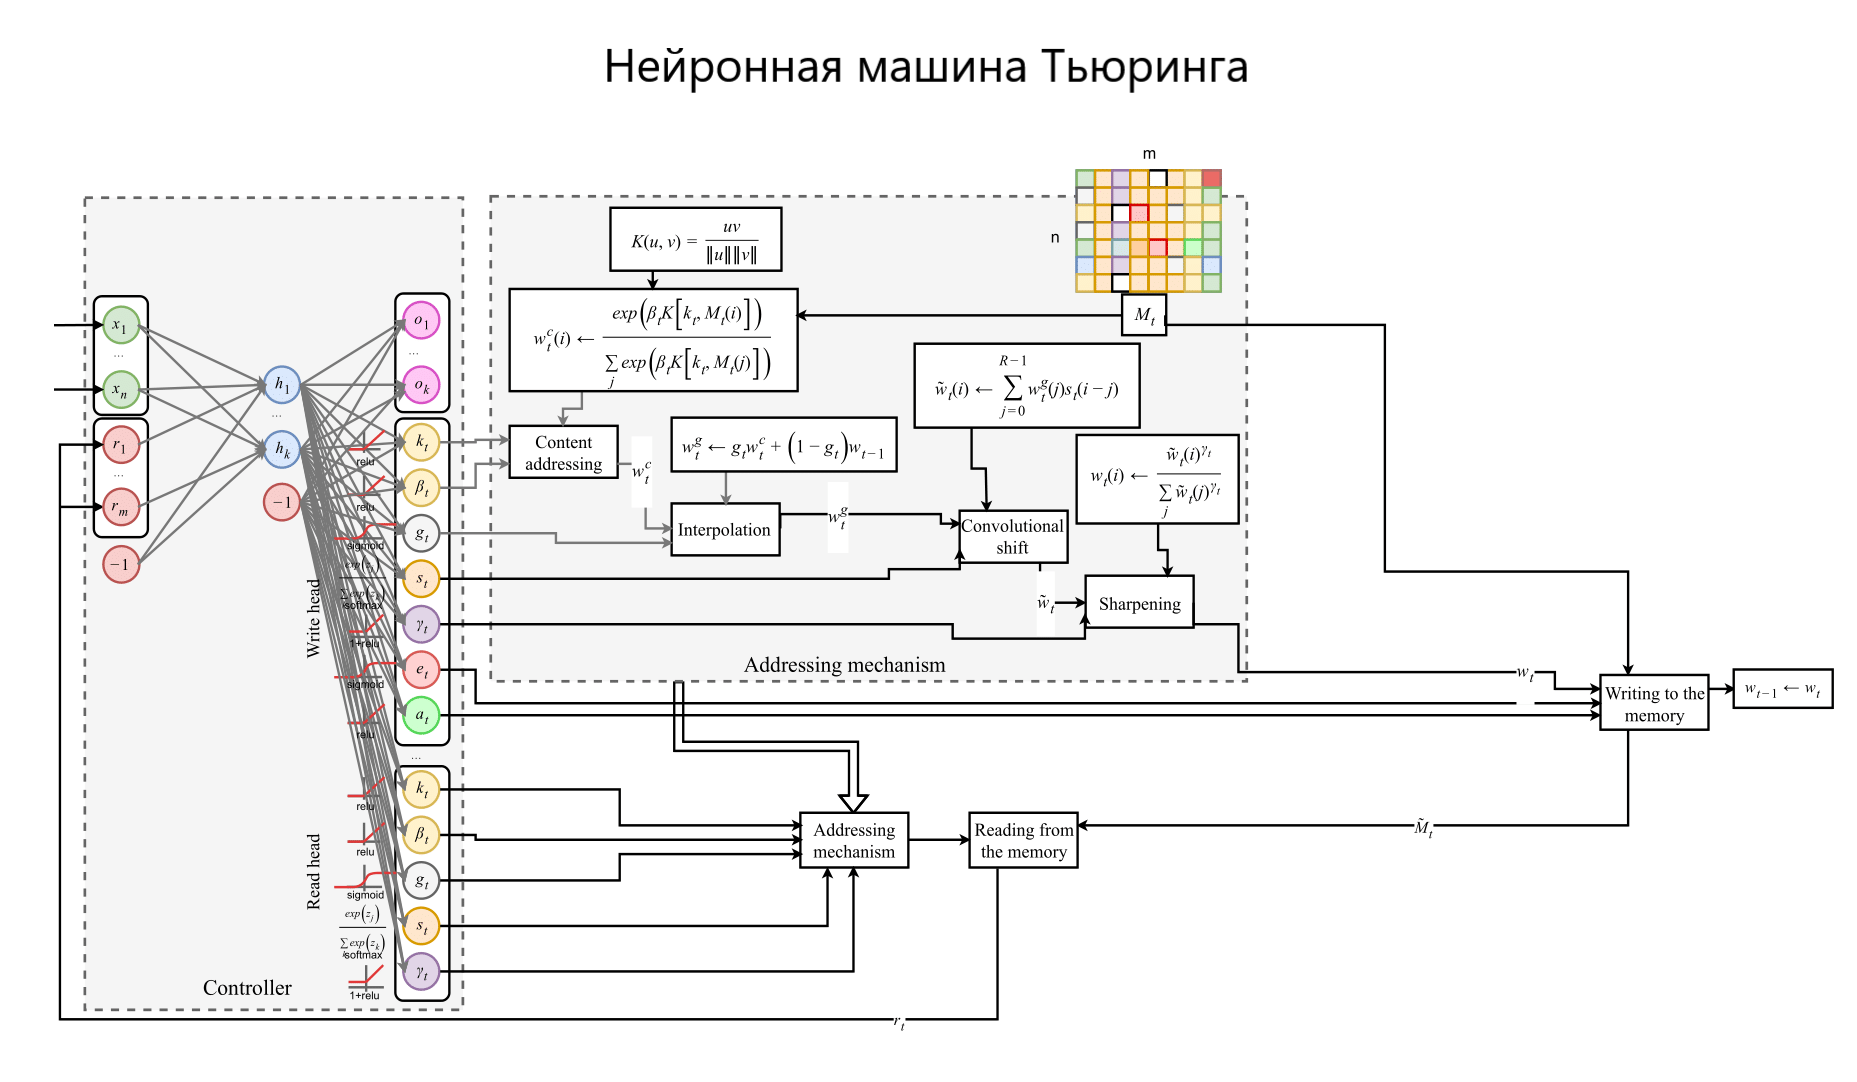

### **Пример**

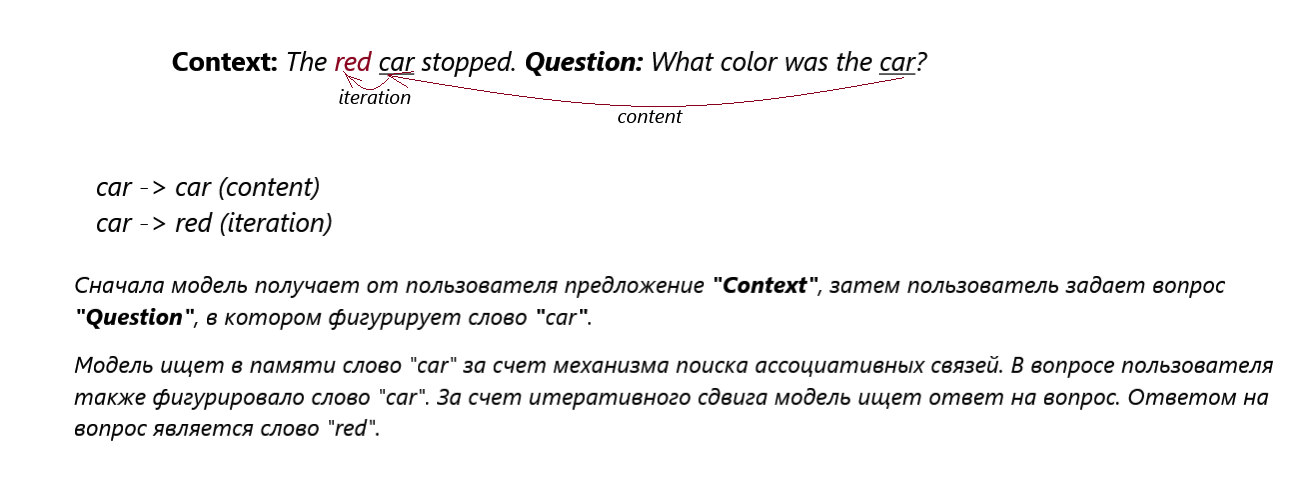

### **Контроллер**

Контроллер является обучаемой частью нейронной машины Тьюринга. Контроллер выполняет все необходимые вычисления, в том числе обеспечивает управление памятью в автоматическом режиме (без участия человека).

В качестве контроллера может выступать <u>нейронная сеть прямого распространения</u>, <u>любая рекуррентная нейронная сеть, в частности, LSTM или управляемый рекуррентный блок (gated recurrent unit, GRU)</u>.

На каждой итерации работы нейронной машины Тьюринга контроллер **принимает на вход вектор xt**, поступающий из выборки (обучающей или тестовой) **и вектор чтения rt**, полученный при чтении предыдущего состояния внешней памяти.<br>

<u>Входной слой имеет размер:</u><br>

*controller_input_shape* = d + hr ∗ m,<br>

где *d* – длина входного вектора,<br>
*hr* – количество считывающих головок,<br>
*m* – длина слота внешней памяти.<br>

<u>Выходной слой контроллера имеет размер:</u><br>

*controller_output_shape* = d𝘫  + (hr + hw) ∗ (m + r + 3) + hw ∗ 2 ∗ m,<br>

где *d𝘫* – выходной  вектор,<br>
*m* – длина слота внешней памяти,<br>
*hr* – количество считывающих головок,<br>
*hw* – количество записывающих головок,<br>
*r* – длина вектора сверточного сдвига.


### **Механизм адресации памяти**

Контроллер не знает длину m матрицы внешней памяти.
Эта величина связана только с механизмом адресации памяти.<br>
На каждой итерации работы нейронной машины Тьюринга взаимодействие происходит целиком со всей матрицей внешней памяти. Степень взаимодействия с каждой строкой (слотом) матрицы определяется весовым вектором   image.png (для каждой считывающей и записывающей головки свой весовой вектор). Этот весовой вектор рассчитывается в зависимости от параметров головки, получаемых от контроллера, а также текущего состояния памяти Mt и предыдущего весового вектора wt−1.<br>
Процесс создания таких весовых векторов для определения мест, где следует считывать и записывать данные можно представить в виде **четырёх стадий**. На каждой стадии генерируется промежуточный весовой вектор, который передаётся на следующую стадию.





####**Адресация по контенту (Content Addressing)**
Цель **первой стадии** заключается в создании весового вектора на основе степени близости каждой строки в памяти к length-N вектору kt, полученному от контроллера. Этот весовой вектор будет называться весовым вектором контента (содержимого) и обозначаться как  image.png.<br>
Весовой вектор контента позволяет контроллеру выбирать значения, похожие на уже знакомые значения, что называется адресацией по контенту. Для каждой головки контроллер производит вектор-ключ kt, который сравнивается с каждой строкой Mt, используя меру сходства.<br>
В некоторых случаях необходимо уметь извлечь значения из конкретных ячеек памяти, а не прочитать конкретные значения в памяти. Это называется адресация по местоположению. А для её реализации нам нужны еще три этапа адресации.


#### **Интерполяция (Interpolation)**
На **втором этапе** вентиль интерполяции (interpolation gate), представленный скалярным параметром gt ∈ (0, 1), смешивает вектор контента wcimage.png и весовой вектор предыдущего шага работы NTM wt−1 с определенной пропорцией, чтобы создать вентильный весовой вектор image.png
 Это позволяет системе определить, когда использовать или игнорировать адресацию на основе контента и в какой степени.


> 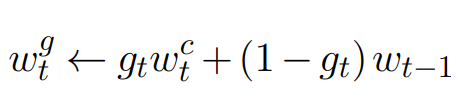




#### **Сверточный сдвиг (Convolutional shift)**
**Третьим этапом** необходимо добавить функциональность смещения фокуса на другие строки. Предположим, что диапазон допустимых смещений ограничен одним из системных параметров. Например, головка внимания может сместиться вперед на одну строку (+1), оставаться на месте (0) или сместиться назад на одну строку (-1). При этом сдвиги выполняются по модулю m, то есть сдвиг вперед с нижней строки памяти перемещает внимание головки на верхнюю строку, а сдвиг назад верхней строки перемещает внимание головки на нижнюю строку. После операции вентильной интерполяции каждая головка производит нормированное взвешивание (распределение) сдвига st и происходит следующее перемещение (при помощи операции свертки) для расчёта веса сдвига w˜t:



> 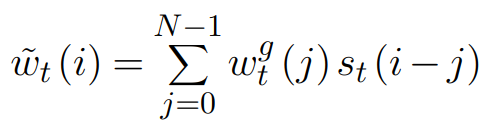





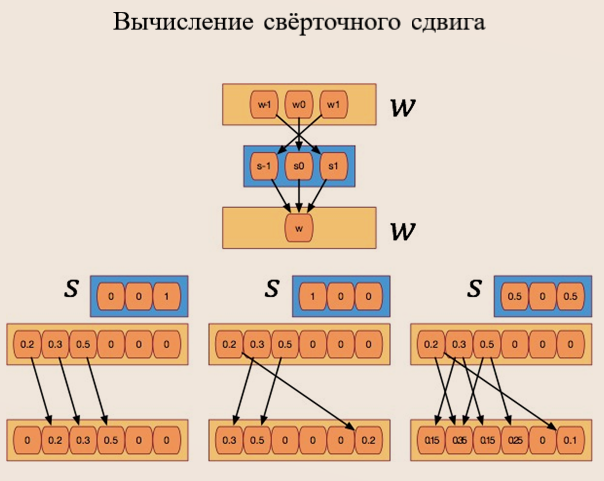






####	**Заострение внимания, уточнение (Sharpening)**

Четвертая и последняя стадия, называемая "уточнением", используется для предотвращения размытия весового распределения  image.png, вызванного операцией сверточного сдвига. Для этого требуется скаляр γ ≥ 1 и использование операции softmax.



> 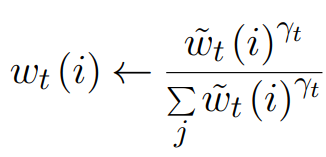

**Пример вычисления**
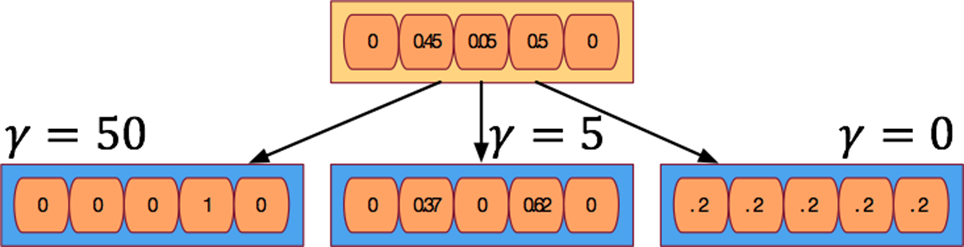


#### **Чтение из памяти**
Mt – матрица внешней памяти с m строками и n столбцами в момент времени t. Чтобы осуществить чтение (и запись) требуется некий механизм внимания, который определяет, откуда головка должна считать данные. Механизм внимания будет нормированным по длине m весовым вектором wt.
Для неё мы будем использовать полученный весовой вектор wr ∈ R
n. Каждую строку M(i) матрицы M домножим на соответствующий коэффициент весового вектора wt(i), и, затем,
элементы каждой строки просуммируем. В результате получим новый вектор, каждая компонента которого соответствует взвешенной сумме элементов соответствующего столбца матрицы M.
Головка чтения вернёт вектор rt.



> 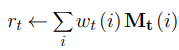



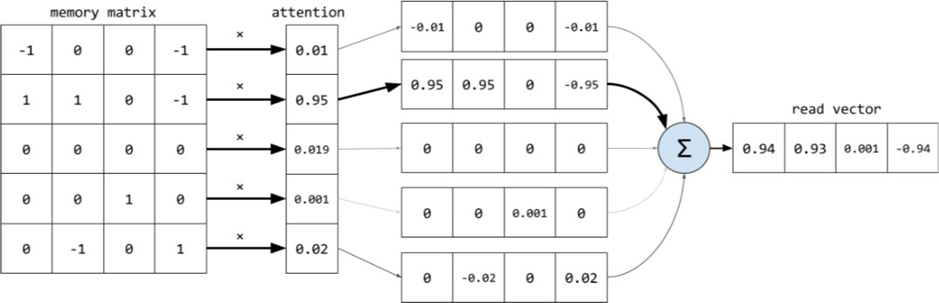

#### **Запись в память**
Операция чтения включает в себя два отдельных шага:
* стирание,
* добавление.<br>

Чтобы стереть старые данные, записывающей головке нужен новый вектор. Стирающий вектор используется в конъюнкции с весовым вектором для определения, какие элементы в строке следует удалить, оставить неизменными или произвести что-то среднее.

На каждом шаге t записывающая головка производит весовой вектор wt, а также стирающий вектор (erase vector) et. Размер вектора wt равен M . Размер вектора et равен n. Каждая компонента стирающего вектора лежит в интервале (0, 1) (контроллер имеет сигмоидные функции активации для компонент этого вектора). Векторы памяти Mt−1 (i) с предыдущего шага модифицируются следующим образом:

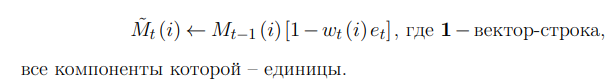

Следовательно, элементы ячейки памяти сбрасываются на ноль только в том случае, когда весовой вектор и элемент стирающего вектора являются единичными; если либо компонента весового вектора равна нулю, либо компонента стирающего вектора равна нулю, память остается неизменной.
При наличии нескольких записывающих головок, операции стирания могут выполняться в любом порядке, поскольку умножение является коммутативным.
Но вначале должны быть выполнены все операции стирания по всем записывающим головкам, а уже затем должны быть выполнены все операции добавления (add) к памяти по всем записывающим головкам.
Добавляющий вектор – это новая запись (новая информация).
Порядок, в котором выполняются операции добавления к памяти, не имеет значения. Объединенные операции стирания и добавления для всех головок записи дают окончательное содержимое памяти в момент времени t.



> 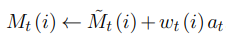

**Пример обновления матрицы внешней памяти**

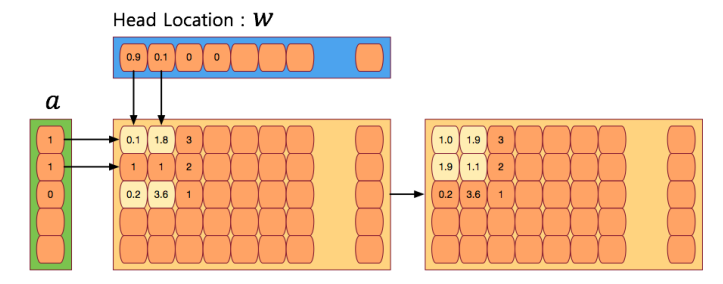







## **Преимущества:**
* нейронные сети с внешней памятью обладают большей "долгосрочной памятью", чем LSTM;
* имеют бОльшую обобщающую способность;
* в некоторых случаях они превосходят LSTM по скорости обучения.


---







## **Недостатки:**
*	медленный процесс обучения;
*	скорость обучения зависит от начальной инициализации внешней памяти и весовых коэффициентов контроллера;
*	размер памяти является гиперпараметром, как следствие необходимо несколько запусков процесса обучения для определения оптимального размера памяти;
*	косинусная мера сходства в качестве результата возвращает NaN каждый раз, когда нулевой вектор фигурирует в вычислениях;
*	операция "уточнение" может привести к результату Inf/Inf, если γ слишком большое. Проблему c большим γ можно решить при помощи простого отсеченния, если результат операции выходит за границы заданного диапазона.


---



## **Применение на практике**

Мы создаем минимальную реализацию модели Нейронной машины Тьюринга. Модель реализована с использованием фреймворка TensorFlow и специально создана в простой форме для облегчения понимания.

Обучим модель задаче копирования, аналогичной той, которая была представлена в оригинальной статье. В задаче копирования NTM получает последовательность случайных битов по одному и затем последовательность -1 той же длины. Модель обучается выводить исходные биты последовательности при получении -1.

In [ ]:
# Импорт необходимых библиотек

import os
from datetime import datetime

import numpy as np

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

tf.config.set_visible_devices([], 'GPU')

####**Memory NTM**

Память представляет собой просто матрицу из 100 строк и 20 столбцов. Перед началом каждой новой последовательности, Матрица памяти заполнена небольшим постоянным значением 1E-6.

При получении внешних входных данных модель пропускает их и предыдущий считываемый вектор через слой feedforward. Выходные данные этого шага передаются головкам чтения-записи. Затем выходные данные первого слоя объединяются с новым вектором чтения и проходят через последний полносвязный слой для получения внешнего вывода.

Головки чтения и записи пропускают свой входной вектор через плотный слой для вычисления параметров, которые используются для доступа к памяти и выполнения операций чтения и записи. Для головки чтения эти параметры включают вектор-ключ (k), параметр бета (beta), параметр усиления (g), параметр гамма (gamma) и вектор сдвига (s). Вектор-ключ сравнивается с каждой строкой матрицы памяти для получения весового вектора по строкам. Вектор сдвига длины 3 используется для перемещения головки вверх и вниз или удержания ее на месте. Параметры beta, g и gamma используются для уточнения весового вектора. Вес, присвоенный новому весовому вектору по сравнению с предыдущим, вычисляется следующим образом:<br>
 w = g * w_new + (1 - g) * w_prev<br>

 Головка записи использует те же параметры, а также два вектора erase и add. Они используются для обновления каждой строки i матрицы памяти следующим образом:

M[i, :] = M[i, :] * (1 - erase * w[i]) + add * w[i]

Здесь erase и add имеют такое же количество элементов, как и количество столбцов в матрице памяти. Вектор erase используется для стирания (обнуления) значений в соответствующих ячейках памяти, а вектор add - для добавления новых значений в эти ячейки.

In [ ]:

def _convolve(w, s):
    assert s.shape[1] == 3
    first_col = tf.slice(w, [0, 0], [-1, 1])
    last_col = tf.slice(w, [0, w.shape[1] - 1], [-1, 1])
    t = tf.concat([last_col, w, first_col], axis=1)
    s = tf.cast(s, dtype='float32')
    c = tf.nn.conv1d(tf.reshape(t, (1, -1, 1)), tf.reshape(s, (-1, 1, 1)), stride=1, padding='VALID')
    c = tf.reshape(c, (-1,))
    return c


class NTMMemory:
    def __init__(self, mem):
        self.n_rows = mem.shape[0]
        self.n_cols = mem.shape[1]
        self.mem = mem

    def update(self, mem):
        self.mem = tf.identity(mem)

    def size(self):
        return self.n_rows, self.n_cols

    def read(self, weights: tf.Tensor):
        return tf.linalg.matvec(tf.transpose(self.mem), weights)

    def write(self, w, e, a):
        erase = tf.matmul(tf.transpose(w), e)
        add = tf.matmul(tf.transpose(w), a)
        self.mem = self.mem * (1 - erase) + add

    def address(self, k, beta, g, s, gamma, w_prev):
        # Content focus
        wc = self._similarity(k, beta)

        # Location focus
        wg = self._interpolate(w_prev, wc, g)
        w_hat = self._shift(wg, s)
        w = self._sharpen(w_hat, gamma)

        return w

    def _similarity(self, k, beta):
        cos_sim = 1 - tf.keras.losses.cosine_similarity(self.mem + 1e-16, k + 1e-16)
        w = tf.nn.softmax(beta * cos_sim, axis=-1)
        return w

    def _interpolate(self, w_prev, wc, g):
        return g * wc + (1 - g) * w_prev

    def _shift(self, wg, s):
        result = _convolve(wg, s)
        return result

    def _sharpen(self, w_hat, gamma):
        w = tf.pow(w_hat, gamma)
        w = w / (tf.math.reduce_sum(w) + 1e-16)
        return w

#### **Read and write heads**

In [ ]:
class NTMHeadBase(Model):
    def __init__(self, mem):
        super(NTMHeadBase, self).__init__()

        self.n_rows, self.n_cols = mem.size()
        self.mem = mem

    def _address_memory(self, k, beta, g, s, gamma, w_prev):
        # Handle Activations
        beta = tf.nn.softplus(beta)
        g = tf.nn.sigmoid(g)
        s = tf.nn.softmax(s)
        gamma = 1 + tf.nn.softplus(gamma)
        w = self.mem.address(k, beta, g, s, gamma, w_prev)
        return w


class NTMReadHead(NTMHeadBase):
    def __init__(self, memory, controller_output_size):
        super(NTMReadHead, self).__init__(memory)

        # The read head should output the variables k, beta, g, s, and gamma described in the paper.
        # k is the key vector with length equal to the number of columns in the memory matrix.
        # beta, g, and gamma are scalars. s is the shift vector which usually has length 3.
        # So the output size should be n_cols + 6.
        self.output_size = self.n_cols + 6
        self.fc_read = Dense(self.output_size, input_shape=(controller_output_size,))

    def call(self, x, w_prev):
        x = self.fc_read(x)
        k, beta, g, s, gamma = tf.split(x, [self.n_cols, 1, 1, 3, 1], axis=-1)

        # Read from memory
        w = self._address_memory(k, beta, g, s, gamma, w_prev)
        r = self.mem.read(w)
        return r, w


class NTMWriteHead(NTMHeadBase):
    def __init__(self, memory, controller_output_size):
        super(NTMWriteHead, self).__init__(memory)

        # The read head should output the variables k, beta, g, s, gamma, e, and a described in the paper.
        # k is the key vector with length equal to the number of columns in the memory matrix.
        # e and a are the erase and add vectors which also have same length as the key vector.
        # beta, g, and gamma are scalars. s is the shift vector which usually has length 3.
        # So the output size should be n_cols * 3 + 6.
        self.output_size = self.n_cols * 3 + 6
        self.fc_write = Dense(self.output_size, input_shape=(controller_output_size,))

    def call(self, x, w_prev):
        x = self.fc_write(x)
        k, beta, g, s, gamma, e, a = tf.split(x, [self.n_cols, 1, 1, 3, 1, self.n_cols, self.n_cols], axis=-1)

        # e should be in [0, 1]
        e = tf.nn.sigmoid(e)

        # Write to memory
        w = self._address_memory(k, beta, g, s, gamma, w_prev)
        self.mem.write(w, e, a)G        return x, w

#### **Controller**

Контроллер представляет собой простую нейронную сеть с прямыми связями. Она принимает два входа:<br>
* внешний вход, который представляет собой последовательность битов, и
* внутренний вход, который представляет собой предыдущий вектор, считанный из памяти.

In [ ]:
class NTM(Model):
    def __init__(self, n_heads=1, memory_dim=20, memory_size=100, external_output_size=1):
        super(NTM, self).__init__()

        self.memory_size = memory_size
        self.memory_dim = memory_dim
        self.n_heads = n_heads
        self.mem = NTMMemory(tf.ones(shape=(memory_size, memory_dim), dtype='float32') * 1e-8)
        self.read_head = NTMReadHead(self.mem, 200)
        self.write_head = NTMWriteHead(self.mem, 200)

        self.reads_bias = tf.Variable(tf.zeros(shape=(1, memory_dim), dtype='float32'))
        self.fc1 = Dense(200, activation='relu')
        self.fc_out1 = Dense(100, activation='relu')
        self.fc_external_out = Dense(external_output_size)
        self.init_read = tf.Variable(tf.ones(shape=(1, self.memory_dim), dtype='float32') * 1e-8)

        w_init = np.zeros((1, self.memory_size), dtype='float32')
        w_init[0, 0] = 100
        self.init_read_w = tf.Variable(w_init, name='init_read_w')
        self.init_write_w = tf.Variable(w_init, name='init_write_w')

    def get_start_state(self):

        return {
            'M': tf.ones(shape=(self.memory_size, self.memory_dim), dtype='float32') * 1e-8,
            'read_w': tf.nn.softmax(self.init_read_w),
            'write_w': tf.nn.softmax(self.init_write_w),
            'read_prev': self.init_read,
        }

    @tf.function
    def call(self, x, prev_state):
        self.mem.update(prev_state['M'])

        x = tf.cast(x, dtype='float32')
        x = tf.reshape(x, [1, -1])
        x = tf.concat([x, prev_state['read_prev'] + self.reads_bias], axis=-1)
        x = self.fc1(x)

        read, read_w = self.read_head(x, prev_state['read_w'])
        write, write_w = self.write_head(x, prev_state['write_w'])

        x = tf.concat([x, read], axis=-1)
        x = self.fc_out1(x)

        out = self.fc_external_out(x)
        state = {
            'M': self.mem.mem,
            'read_w': read_w,
            'write_w': write_w,
            'read_prev': read
        }

        return out, state

Обучим модель задаче копирования

In [ ]:
ntm = NTM()

if os.path.exists('./copy_model'):
    print('loading weights')
    ntm.load_weights('copy_model/weights')

loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Nadam()

current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)


def train_step(batch):
    losses = []

    with tf.GradientTape() as tape:
        for seq in batch:
            state = ntm.get_start_state()

            for b in seq:
                x = tf.convert_to_tensor([[b]])
                _, state = ntm(x, state)

            for b in seq:
                y_true = tf.convert_to_tensor([[b]])
                x = tf.convert_to_tensor([[-1]], dtype='float32')
                pred, state = ntm(x, state)
                loss = loss_object(y_true, pred)
                losses.append(loss)

        loss = tf.reduce_mean(losses)
        gradients = tape.gradient(loss, ntm.trainable_variables)
        gradients = [tf.clip_by_norm(g, 1) for g in gradients]
        optimizer.apply_gradients(zip(gradients, ntm.trainable_variables))


def create_val_set(max_len):
    val_set = []
    for _ in range(10):
        length = np.random.randint(1, max_len + 1)
        seq = np.random.randint(2, size=length)
        val_set.append(seq)
    return val_set


def eval(val_set, i, min_loss):
    losses = []
    for seq in val_set:
        state = ntm.get_start_state()

        for b in seq:
            x = tf.convert_to_tensor([[b]])
            _, state = ntm(x, state)

        for b in seq:
            y_true = tf.convert_to_tensor([[b]])
            x = tf.convert_to_tensor([[-1]], dtype='float32')
            pred, state = ntm(x, state)
            loss = loss_object(y_true, pred)
            losses.append(loss)

    loss = tf.reduce_mean(losses)
    with train_summary_writer.as_default():
        tf.summary.scalar('eval_loss', loss.numpy(), step=i)
    print(i, loss.numpy())

    if loss.numpy() < min_loss:
        min_loss = loss.numpy()
        ntm.save_weights('copy_model/weights', save_format='tf')
    return min_loss


def train():
    min_loss = float('inf')
    val_set = create_val_set(max_len=20)
    batch_size = 10

    for i in range(10000):
        batch = []
        max_len = 20

        for _ in range(batch_size):
            length = np.random.randint(1, max_len + 1)
            seq = np.random.randint(2, size=length)
            batch.append(seq)

        train_step(batch)

        if i % 10 == 0:
            min_loss = eval(val_set, i * batch_size, min_loss)
            if min_loss < 1e-2:
                break


if __name__ == '__main__':
    train()

0 0.69511026
100 0.68572474
200 0.69048184
300 0.6853443
400 0.6701042
500 0.6570829
600 0.65278274
700 0.64017665
800 0.63359135
900 0.6198465
1000 0.6019369
1100 0.58060855
1200 0.55631524
1300 0.5375561
1400 0.50856924
1500 0.47100005
1600 0.44150332
1700 0.4196758
1800 0.3815165
1900 0.33139825
2000 0.26103646
2100 0.55572206
2200 0.4517663
2300 0.31182203
2400 0.24224216
2500 0.023377104
2600 0.009004779


#### **Neural Turing Machine (задача копирования)**

**Инициализация модели**

In [ ]:
ntm = NTM()

**Создание тестовых данных**<br>
Тестовые входные данные, которые мы будем передавать в NTM, состоят из случайных битов, за которыми следуют разделители (-1). Все они будут подаваться в NTM по одному за раз.

In [ ]:
L = 10
inputs = np.random.randint(2, size=(2*L,))
inputs[L:] = -1
print(inputs)

[ 0  0  1  1  0  0  1  0  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


**Загружаем веса обученной модели NTM**

In [ ]:
ntm.load_weights('copy_model/weights')

**Сбрасываем память NTM и подаем на вход тестовые данные**

In [ ]:
state = ntm.get_start_state()

preds = []
for bit in inputs:
    x = tf.convert_to_tensor([[bit]])
    y, state = ntm(x, state)
    pred = np.round(tf.nn.sigmoid(y).numpy())
    preds += [pred]
print('true      :', list(inputs[:L]))
print('prediction:', [int(x) for x in np.round(preds[L:])])

true      : [0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
prediction: [0, 0, 1, 1, 0, 0, 1, 0, 1, 1]


## **Полезные ссылки**

*   руководство по нейронной машине Тьюринга и дифференцируемому нейронному компьютеру:
https://nauchkor.ru/uploads/documents/61af1479e4dde5000108d9ec.pdf
*   Graves A.,  Wayne G.,  Danihelka I.  /  Neural  Turing   Machines   // In: CoRR. — 2014. http://arxiv.org/abs/1410.5401v2
* https://github.com/JoergFranke/ADNC/blob/master/README.md
* https://github.com/david-wb/neural-turing-machine/blob/master/README.md

